<a href="https://colab.research.google.com/github/leoquiroa/Prophet/blob/master/AirlinePassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [7]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/data/international-airline-passengers.csv'
df_air_orig = pd.read_csv(url, 
                              nrows=144,
                              skiprows = 1, 
                              names = ['ds', 'y'], 
                              parse_dates = True )
df_air = df_air_orig 
df_air.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df_air.tail()

,ds,y
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [8]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null object
y     144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
df_air.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


Add last day of the month

In [0]:
df_air['ds']=pd.to_datetime(df_air['ds'])+pd.tseries.offsets.MonthEnd(0)

In [11]:
df_air.tail()

,ds,y
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390
143,1960-12-31,432


In [12]:
df_air.shape

(144, 2)

Forecast the last two years.

In [15]:
train = df_air[:120]
test = df_air[120:]
print(train.shape)
print(test.shape)

(120, 2)
(24, 2)


Let's instantiate a Prophet object and fit it to the training data, using the default Prophet parameters.


In [16]:
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Let's make the future data frame and make the predictions. We need to pass freq='m' because we want monthly predictions. The periods is equal to 24 because we want 2 years

In [17]:
future = m.make_future_dataframe(periods=24, freq='m')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,87.140669,64.184483,110.831888
1,1949-02-28,84.739482,59.188445,108.266599
2,1949-03-31,116.989800,93.293338,141.518577
3,1949-04-30,109.632953,85.684457,132.089521
4,1949-05-31,110.956821,85.457477,135.077774


In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,87.140669,64.184483,110.831888
1,1949-02-28,84.739482,59.188445,108.266599
2,1949-03-31,116.989800,93.293338,141.518577
3,1949-04-30,109.632953,85.684457,132.089521
4,1949-05-31,110.956821,85.457477,135.077774


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-08-31,521.850474,497.017547,547.621800
140,1960-09-30,482.064579,456.820129,505.318689
141,1960-10-31,449.585006,425.921465,475.188658
142,1960-11-30,421.209923,397.439577,445.062737
143,1960-12-31,447.019679,424.301553,471.510968


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].shape

(144, 4)

The dots are the actual data points. The line through the dots is the predicted values. The shared area represents the uncertainty intervals.

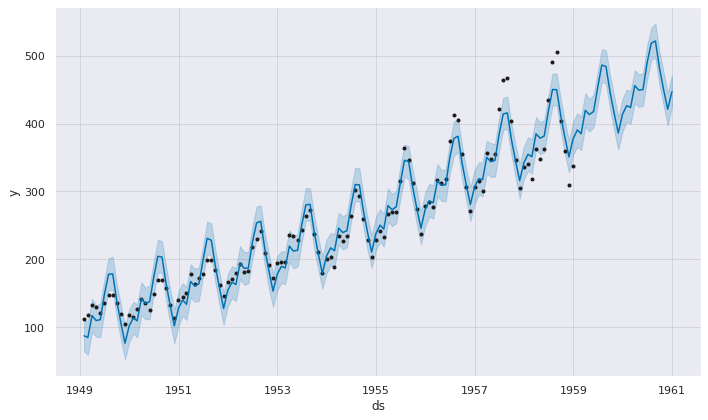

In [22]:
fig = m.plot(forecast)

Trend and seasonality

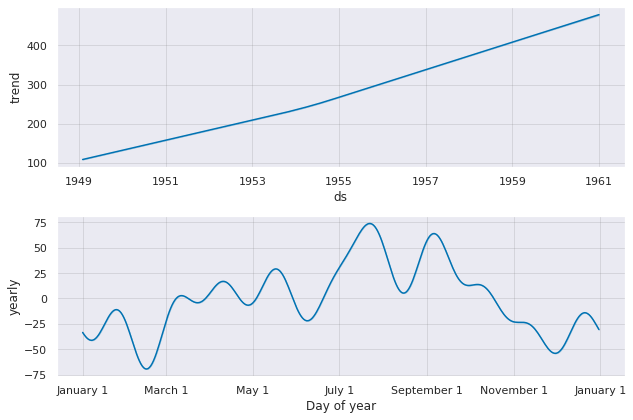

In [23]:
fig_decompose = m.plot_components(forecast)

## Multiplicative seasonality


It looks like the latter seasonal high and low data points in the training data weren't picked up super well. Perhpas we should try making that seasonality effect multiplicative.

In [24]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future2 = m2.make_future_dataframe(periods=24, freq='m')
forecast = m2.predict(future2)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-31,104.175405,91.696460,114.755409
1,1949-02-28,103.249977,91.104216,114.812753
2,1949-03-31,119.945498,108.150494,132.370428
3,1949-04-30,117.284750,106.122778,129.638823
4,1949-05-31,119.376593,107.148843,130.777638
...,...,...,...,...
139,1960-08-31,551.778882,537.761521,564.551031
140,1960-09-30,474.840840,462.527637,488.816644
141,1960-10-31,412.914116,398.631638,425.525161
142,1960-11-30,363.290631,350.266271,375.770435


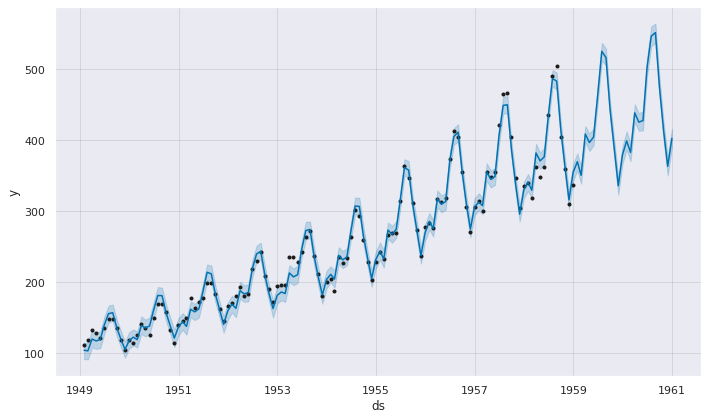

In [26]:
fig = m.plot(forecast)

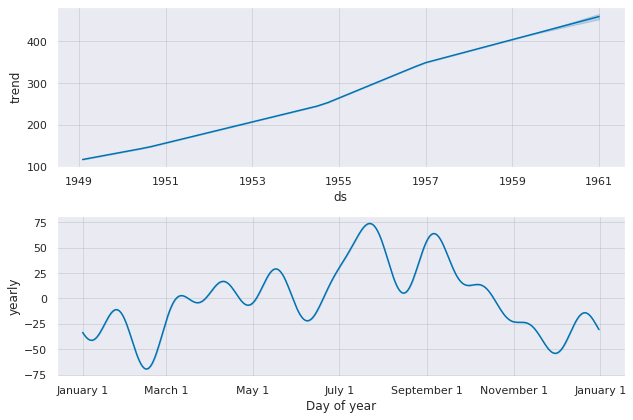

In [27]:
fig = m.plot_components(forecast)

Looks like people travel in the summer.

## Model evaluation

Let's look at how the model with the multiplicative seasonality effect performs compared to a persistence model.

In [28]:
forecast_persist = forecast.copy()
forecast_persist['cutoff'] = pd.to_datetime('1959-01')
forecast_persist['y'] = df_air['y']
forecast_persist['yhat'] = df_air.at[119,'y']
forecast_persist.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,cutoff,y
139,1960-08-31,449.980122,537.761521,564.551031,444.825825,454.956197,0.226229,0.226229,0.226229,0.226229,0.226229,0.226229,0.0,0.0,0.0,337,1959-01-01,606
140,1960-09-30,452.245090,462.527637,488.816644,446.682557,457.538173,0.049964,0.049964,0.049964,0.049964,0.049964,0.049964,0.0,0.0,0.0,337,1959-01-01,508
141,1960-10-31,454.585558,398.631638,425.525161,448.784785,460.224061,-0.091669,-0.091669,-0.091669,-0.091669,-0.091669,-0.091669,0.0,0.0,0.0,337,1959-01-01,461
142,1960-11-30,456.850526,350.266271,375.770435,450.658682,462.755211,-0.204793,-0.204793,-0.204793,-0.204793,-0.204793,-0.204793,0.0,0.0,0.0,337,1959-01-01,390
143,1960-12-31,459.190993,389.837790,416.225434,452.550561,465.412171,-0.122977,-0.122977,-0.122977,-0.122977,-0.122977,-0.122977,0.0,0.0,0.0,337,1959-01-01,432


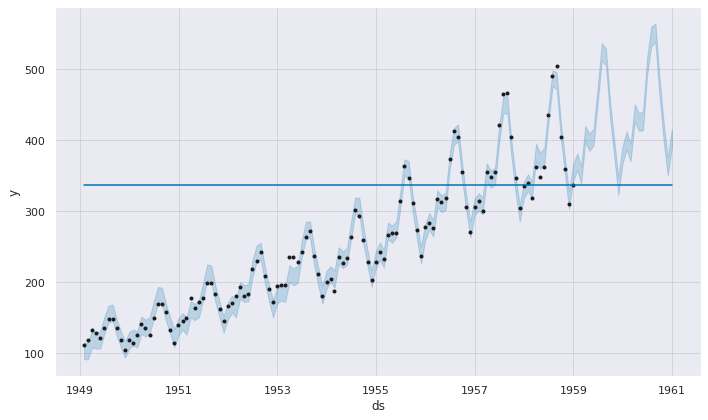

In [29]:
fig = m.plot(forecast_persist)

The straight line is the persistence forecast based on the value at the last training month, December 1958. The predicted range of values for the Prophet model is in the shaded region.

In [31]:
forecast['cutoff'] = pd.to_datetime('1958-12-31')
forecast['y'] = df_air['y']
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,cutoff,y
139,1960-08-31,449.980122,537.761521,564.551031,444.825825,454.956197,0.226229,0.226229,0.226229,0.226229,0.226229,0.226229,0.0,0.0,0.0,551.778882,1958-12-31,606
140,1960-09-30,452.245090,462.527637,488.816644,446.682557,457.538173,0.049964,0.049964,0.049964,0.049964,0.049964,0.049964,0.0,0.0,0.0,474.840840,1958-12-31,508
141,1960-10-31,454.585558,398.631638,425.525161,448.784785,460.224061,-0.091669,-0.091669,-0.091669,-0.091669,-0.091669,-0.091669,0.0,0.0,0.0,412.914116,1958-12-31,461
142,1960-11-30,456.850526,350.266271,375.770435,450.658682,462.755211,-0.204793,-0.204793,-0.204793,-0.204793,-0.204793,-0.204793,0.0,0.0,0.0,363.290631,1958-12-31,390
143,1960-12-31,459.190993,389.837790,416.225434,452.550561,465.412171,-0.122977,-0.122977,-0.122977,-0.122977,-0.122977,-0.122977,0.0,0.0,0.0,402.720979,1958-12-31,432


compute the error terms for both models.

In [32]:
df_air_p = performance_metrics(forecast[120:])
df_air_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,59 days,86.085096,9.278205,9.260054,0.026357,1.0
1,90 days,41.970653,6.478476,5.806227,0.016301,1.0
2,120 days,4.666580,2.160227,1.894518,0.004693,1.0
3,151 days,120.014937,10.955133,8.162875,0.019497,0.5
4,181 days,169.326305,13.012544,12.718485,0.028975,0.5


In [33]:
df_persist_p = performance_metrics(forecast_persist[120:])
df_persist_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,58 days,277.0,16.643317,14.0,0.039254,1.0
1,89 days,2393.0,48.918299,37.0,0.092285,1.0
2,119 days,4121.0,64.195015,64.0,0.159470,1.0
3,150 days,5185.0,72.006944,71.0,0.173304,0.5
4,180 days,12557.0,112.058021,109.0,0.241818,0.5


plot the RMSE lines for the two models. I chose RMSE because its a common metric that outputs an error term in the same units as the predicted variable. So in this case, passengers.

In [34]:
df_air_plot = pd.DataFrame([df_air_p['rmse'], df_persist_p['rmse']])
df_air_plot = df_air_plot.T
df_air_plot.columns = ['prophet_rmse', 'persist_rmse']
df_air_plot.head()

,prophet_rmse,persist_rmse
0,9.278205,16.643317
1,6.478476,48.918299
2,2.160227,64.195015
3,10.955133,72.006944
4,13.012544,112.058021


In [35]:
df_plot = df_air_plot[:12]
df_plot

,prophet_rmse,persist_rmse
0,9.278205,16.643317
1,6.478476,48.918299
2,2.160227,64.195015
3,10.955133,72.006944
4,13.012544,112.058021
5,17.451522,177.124250
6,33.993858,216.569850
7,32.860021,180.499307
8,18.451887,101.921538
9,22.373715,52.559490


Text(0, 0.5, 'RMSE')

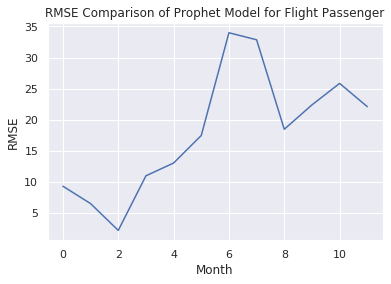

In [36]:
ax = sns.lineplot(
    data=df_plot,
    x=list(range(12)), 
    y='prophet_rmse',
    )
plt.title('RMSE Comparison of Prophet Model for Flight Passenger')
plt.xlabel('Month')
plt.ylabel('RMSE')

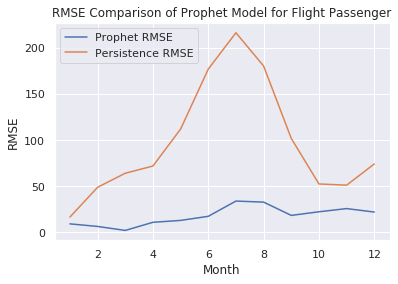

In [37]:
ax = sns.lineplot(
    data=df_plot,
    x=list(range(1, 13)), 
    y='prophet_rmse',
    )

ax = sns.lineplot(
    data=df_plot,
    x=list(range(1, 13)), 
    y='persist_rmse',
    )

plt.title('RMSE Comparison of Prophet Model for Flight Passenger')
plt.xlabel('Month')
plt.ylabel('RMSE')

plt.rcParams['figure.figsize']=(12, 6)
plt.legend(['Prophet RMSE','Persistence RMSE'])

The Persistence model has a higher RMSE for every time period. So Prophet beats the Persistence model! That's a low bar, but we'll take it - predicting the future isn't easy.



Now we will subtract one DataFrame from the other to see the exact differences in errors

In [0]:
df_air_compare = df_persist_p - df_air_p
df_air_compare = df_air_compare.drop(columns=['horizon', 'coverage'])

In [39]:
df_air_compare[:12]

,mse,rmse,mae,mape
0,190.914904,7.365112,4.739946,0.012898
1,2351.029347,42.439823,31.193773,0.075984
2,4116.333420,62.034788,62.105482,0.154777
3,5064.985063,61.051811,62.837125,0.153807
4,12387.673695,99.045477,96.281515,0.212843
5,31068.444387,159.672728,156.727240,0.304368
6,45746.917642,182.575993,183.989615,0.332524
7,31500.218993,147.639286,143.316037,0.276237
8,10047.527873,83.469652,79.554338,0.179555
9,2261.916861,30.185775,25.493983,0.062479
